# Task 1 - IRIS FLOWER CLASSIFICATION
# Linu Roby


The Iris flower dataset consists of three species: setosa, versicolor, and
virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements of Iris
flowers categorized by their respective species. Your objective is to
train a machine learning model that can learn from these
measurements and accurately classify the Iris flowers into their
respective species.

In [1]:
# Importing required libraries
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [2]:
# Load the provided dataset in csv
dataset = pd.read_csv("IRIS.csv")
print("Total number of samples : ",len(dataset))
# View a few rows from the dataset
dataset.head(10)

Total number of samples :  150


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Exploratory Data Analysis

In [3]:
# Check for any null values
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

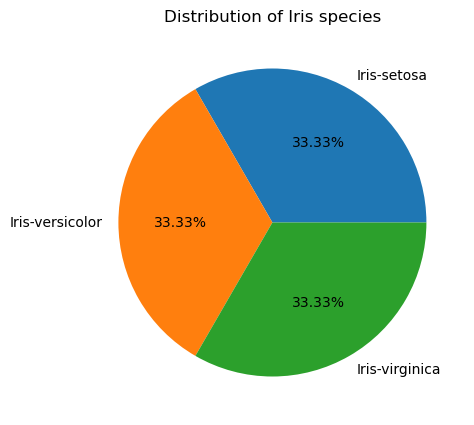

In [5]:
# View distribution of each species in a pie chart
dataset['species'].value_counts()
x_label = dataset['species'].value_counts().index
y_label = dataset['species'].value_counts().values
plt.figure(figsize=(5,5))
plt.pie(y_label,labels=x_label,autopct='%0.2f%%')
plt.title("Distribution of Iris species")
plt.show()

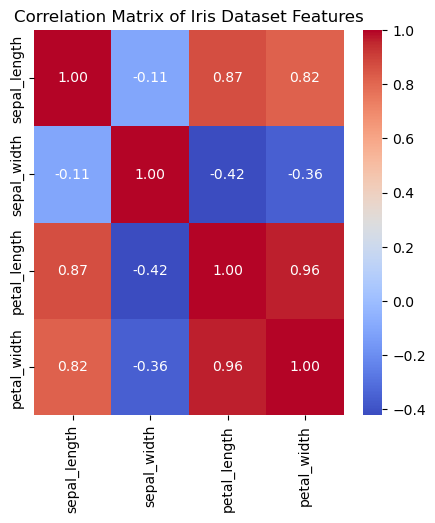

In [6]:
# Check the correlation between features
corr_df = dataset.drop(columns=['species'])
corr_matrix = corr_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()

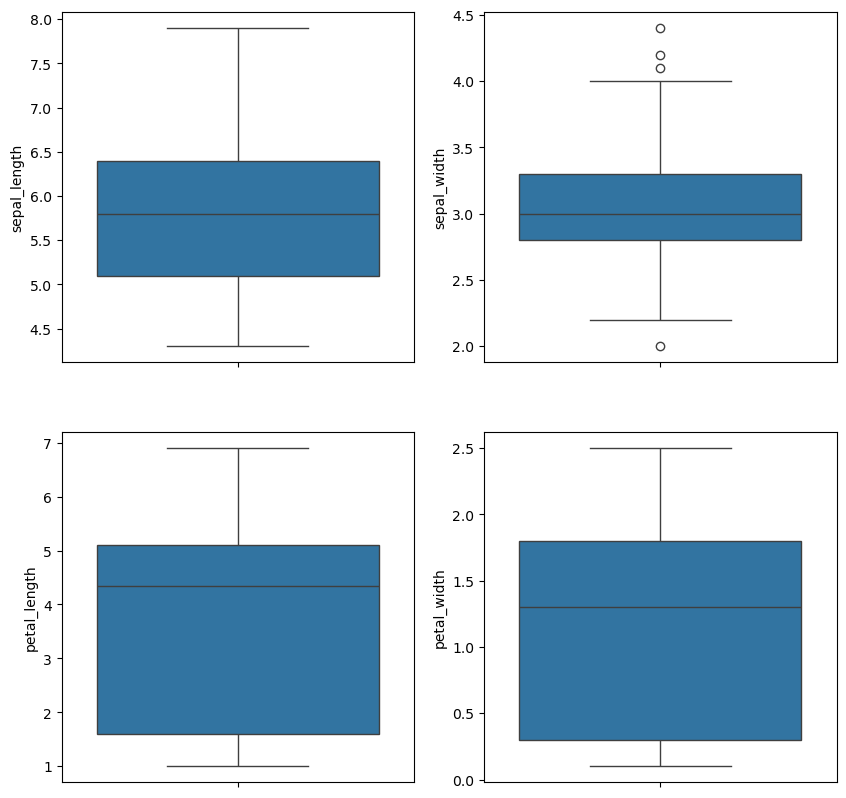

In [7]:
# Visualise Boxplot for outliers
plt.figure(figsize=(10,10))

for i, column in enumerate(corr_df.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=corr_df[column])
plt.show()

In [9]:
# Last column 'species' is the target variable. Drop this and retain features for x list
x_data = dataset.drop('species',axis=1)
# Create y list with target variable
y_data = dataset['species']


In [10]:
print("Features:\n",x_data.head(1),"\nTarget\n",y_data.head(1))

Features:
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2 
Target
 0    Iris-setosa
Name: species, dtype: object


In [11]:
# Split into train and test data (80-20)
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=42)
print("No: of training samples :",len(x_train))
print("No: of testing samples :",len(x_test))

No: of training samples : 120
No: of testing samples : 30


In [12]:
# Decision Tree Classifier
iris_decision = DecisionTreeClassifier()
# Fit with train data
iris_decision.fit(x_train,y_train)
print("Training completed using Decision Tree Classifier")

Training completed using Decision Tree Classifier


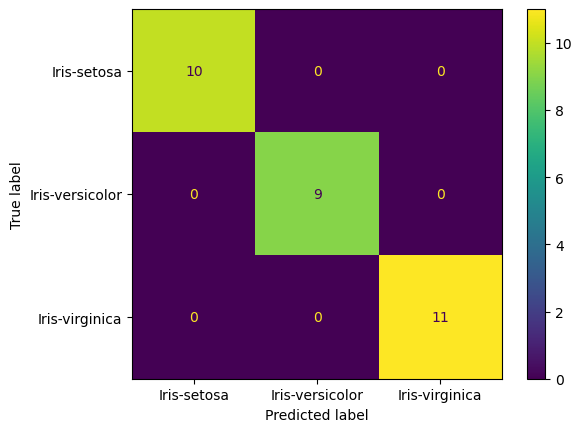

In [13]:
# Test prediction using test data
predicted_species = iris_decision.predict(x_test)
# Display confusion matrix
conf_matrix = confusion_matrix(y_test,predicted_species)
display_confusion = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris_decision.classes_)
display_confusion.plot()

In [14]:
# Print the accuracy of the model
print("Accuracy of the decision tree classifier : ",accuracy_score(y_test,predicted_species)*100,"%")

Accuracy of the decision tree classifier :  100.0 %


# All test instances are correctly classified